In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
# Load the data from the csv file:
data = pd.read_csv("C:/Users/zeus/Desktop/Git Repositories/Road_Accidents/Road Accident Data.csv")

In [154]:
data.head(100)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Longitude,Light_Conditions,Local_Authority_(District),...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,-0.201349,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Clear,Cars
1,200901BS70002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,-0.199248,Daylight,Kensington and Chelsea,...,11,2,Metropolitan Police,Wet,Single carriageway,30,10:59,Urban,Clear,Cars
2,200901BS70003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Minor,51.486668,-0.179599,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Clear,Cars
3,200901BS70004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,-0.203110,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Frosty,Single carriageway,30,08:10,Urban,Other,Heavy Motorcycles
4,200901BS70005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,-0.173445,Darkness,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Clear,Cars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200901BS70122,04-03-2021,Wednesday,Auto traffic signal,T or staggered junction,Minor,51.486622,-0.170814,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Wet,Single carriageway,30,07:05,Urban,Clear,Cars
96,200901BS70123,07-02-2021,Saturday,Give way or uncontrolled,Crossroads,Minor,51.504966,-0.194000,Daylight,Kensington and Chelsea,...,1,1,Metropolitan Police,Dry,Single carriageway,30,13:15,Urban,Other,Cars
97,200901BS70124,17-03-2021,Tuesday,Auto traffic signal,Crossroads,Minor,51.495660,-0.173766,Darkness,Kensington and Chelsea,...,1,1,Metropolitan Police,Dry,Single carriageway,30,23:00,Urban,Clear,Cars
98,200901BS70126,24-02-2021,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,51.490535,-0.173827,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,08:00,Urban,Clear,Public Transport


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307972 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Longitude                   307973 non-null  float64       
 8   Light_Conditions            307973 non-null  object        
 9   Local_Authority_(District)  307973 non-null  object        
 10  Carriageway_Hazards         307973 non-null  object        
 11  Number_of_Casualties        307973 non-

In [172]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'],format = "%d-%m-%Y")
# data['Time'] = pd.to_datetime(data['Time'],format='%H:%M',errors = 'coerce').dt.time

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307972 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Longitude                   307973 non-null  float64       
 8   Light_Conditions            307973 non-null  object        
 9   Local_Authority_(District)  307973 non-null  object        
 10  Carriageway_Hazards         307973 non-null  object        
 11  Number_of_Casualties        307973 non-

In [158]:
data.isnull().sum()
# Data set has 1525 Null value in Road_Type column and 1 Accident_Index column which is null. 

Accident_Index                   1
Accident Date                    0
Day_of_Week                      0
Junction_Control                 0
Junction_Detail                  0
Accident_Severity                0
Latitude                         0
Longitude                        0
Light_Conditions                 0
Local_Authority_(District)       0
Carriageway_Hazards              0
Number_of_Casualties             0
Number_of_Vehicles               0
Police_Force                     0
Road_Surface_Conditions          0
Road_Type                     1525
Speed_limit                      0
Time                             0
Urban_or_Rural_Area              0
Weather_Conditions               0
Vehicle_Type                     0
dtype: int64

In [174]:
data['Road_Type'].replace('null', np.nan, inplace=True)
data['Road_Type'].fillna(data['Road_Type'].mode().iloc[0], inplace=True)

In [175]:
data.isnull().sum()

Accident_Index                1
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Longitude                     0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [178]:
data['Junction_Control'].value_counts()

Junction_Control
Give way or uncontrolled               150045
Data missing or out of range            98056
Auto traffic signal                     32349
Not at junction or within 20 metres     25378
Stop sign                                1685
Authorised person                         460
Name: count, dtype: int64

In [177]:
map_dict = {'Auto traffic sigl': 'Auto traffic signal'}
data['Junction_Control'] = data['Junction_Control'].replace(map_dict)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Longitude,Light_Conditions,Local_Authority_(District),...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,-0.201349,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Clear,Cars
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,-0.199248,Daylight,Kensington and Chelsea,...,11,2,Metropolitan Police,Wet,Single carriageway,30,10:59,Urban,Clear,Cars
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Minor,51.486668,-0.179599,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Clear,Cars
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,-0.203110,Daylight,Kensington and Chelsea,...,1,2,Metropolitan Police,Frosty,Single carriageway,30,08:10,Urban,Other,Heavy Motorcycles
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,-0.173445,Darkness,Kensington and Chelsea,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Clear,Cars


In [94]:
# extract the last 5 digits from the time column
# data['Time'] = data['Time'].apply(lambda x:x[-5:])

In [181]:
data.to_csv('C:/Users/zeus/Desktop/Git Repositories/Road_Accidents/Updated Road Accident Data.csv')

In [2]:
data = pd.read_csv('C:/Users/zeus/Desktop/Git Repositories/Road_Accidents/Updated Road Accident Data.csv')

# Data Analysis part 

### Severity Analysis:
1. Percentage contribution of each severity to the accidents.
3. Calculate the average casulality at different range of Speed_limit

### Temporal Analysis:
1. Weekly count of accidents and show that on a graph(histogram)
2. Distribution of accidents over different times and are there specific times fo the day when accidents are more likely to occur?

### Geospatial Analysis:
1. Location and region with higher incidence of accidents
2. Specific junction types or road conditions associate with high number of accidents

### Junction Analysis:
1. Investigate the 'Junction Detail' and 'Junction Control' columns to understand the role of the junctions in the accidents.

### Weather and Road Conditions:
1. Examine the 'Weather_Conditions' and 'Road_Surface_Conditions' columns to analyze the impact of weather and road conditions on accidents. Identify if certain conditions contribute to a      higher number of accidents.

### Light Conditions
1. Investigate the 'Light_Conditions' column to understand how lighting conditions influence accidents. Determine if accidents are more prevalent in low-light or dark conditions.

### Road Type and Speed Limit:
1. Analyze the relationship between 'Road_Type' and 'Speed_limit' to identify if certain road types or speed limits are associated with higher accident rates.

In [183]:
total_accidents = data['Weather_Conditions'].value_counts().sum()
sub_count = data['Weather_Conditions'].value_counts()
weather_accident = pd.DataFrame(sub_count)
weather_accident.columns = ['Accident Count']
weather_accident['Percentage'] = (sub_count / total_accidents * 100).round(2)
weather_accident.reset_index()

,Weather_Conditions,Accident Count,Percentage
0,Clear,247644,80.41
1,Raining,38403,12.47
2,Other,14859,4.82
3,Snowy,5377,1.75
4,Foggy,1690,0.55


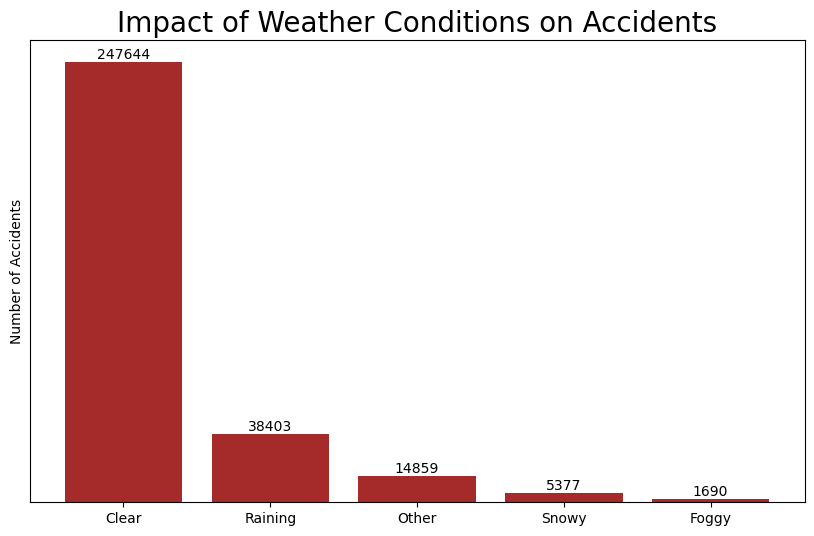

In [226]:
mylabels = ['Clear', 'Raining', 'Other', 'Snowy', 'Foggy']

plt.figure(figsize=[10, 6])
plt.title('Impact of Weather Conditions on Accidents', fontdict={'fontsize': 20})
bars = plt.bar(x=mylabels, height=data['Weather_Conditions'].value_counts(), color='Brown')

# Labeling each bar with its value using ax.text()
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.yticks([])
plt.ylabel("Number of Accidents")
plt.show()

In [185]:
total_accidents = data['Vehicle_Type'].value_counts().sum()
sub_count = data['Vehicle_Type'].value_counts()
vehicle_accident = pd.DataFrame(sub_count)
vehicle_accident.columns = ['Accident Count']
vehicle_accident['Percentage'] = (sub_count / total_accidents * 100).apply(lambda x: '{:.3f}%'.format(x) if x > 0.0001 else '')
print("Percentage Count of Accidents by Different Vehicle Type")
vehicle_accident.reset_index()


Percentage Count of Accidents by Different Vehicle Type


,Vehicle_Type,Accident Count,Percentage
0,Cars,245337,79.662%
1,Vans and Goods Vehicles,24729,8.030%
2,Heavy Motorcycles,14511,4.712%
3,Small Vehicles,10555,3.427%
4,Public Transport,9507,3.087%
5,Other vehicle,2516,0.817%
6,Specialized Vehicles,752,0.244%
7,Bicycle,66,0.021%


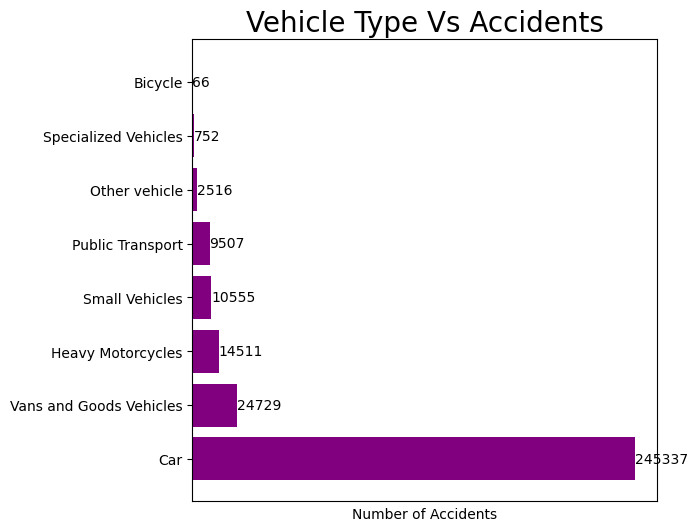

In [225]:
data['Vehicle_Type'].value_counts()
mylabels = ['Car','Vans and Goods Vehicles','Heavy Motorcycles','Small Vehicles','Public Transport','Other vehicle','Specialized Vehicles','Bicycle']
plt.figure(figsize=[6, 6])
plt.title('Vehicle Type Vs Accidents',fontdict={'fontsize':20})
bars = plt.barh(y = mylabels, width = data['Vehicle_Type'].value_counts(), color='Purple')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}',
             va='center', ha='left', fontsize=10, color='black')
plt.xlabel('Number of Accidents')
plt.xticks([])
plt.show()

In [187]:
data.columns

Index(['Unnamed: 0', 'Accident_Index', 'Accident Date', 'Day_of_Week',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Longitude', 'Light_Conditions', 'Local_Authority_(District)',
       'Carriageway_Hazards', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [188]:
# Percentage contribution of each Severity to the Total Accidents. 
total_accidents = data['Accident_Severity'].count()
severity_counts = data['Accident_Severity'].value_counts()
percentage_Contribution= (severity_counts/total_accidents)*100
percentage_Contribution.round(2).apply(lambda x:'{:.1f} %'.format(x) if x>0 else '')

Accident_Severity
Minor      85.5 %
Serious    13.2 %
Fatal       1.3 %
Name: count, dtype: object

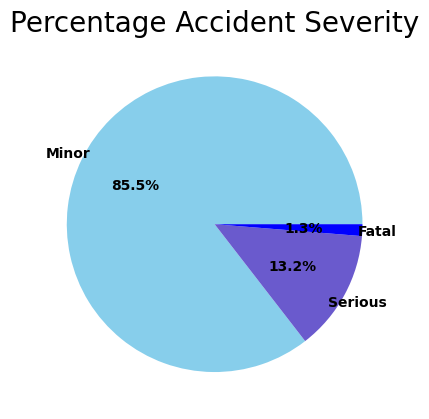

<Figure size 2000x2000 with 0 Axes>

In [229]:
#Percent Accident Severity using pie chart 
mylabels = ['Minor','Serious','Fatal']
color = ['skyblue','slateblue','blue']
plt.title('Percentage Accident Severity',fontdict={'fontsize':20})
plt.pie(data['Accident_Severity'].value_counts(),labels = mylabels,startangle = 0,colors=color,autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
       textprops={'color': 'Black', 'fontsize': 10, 'weight': 'bold', 'horizontalalignment': 'center', 'verticalalignment': 'center'})
plt.figure(figsize=[20,20])

plt.show()



In [190]:
# Calculate the average casulality at different range of Speed_limit
data['Speed_limit'].value_counts()
speed_casualties = data.groupby(['Speed_limit']).agg({'Number_of_Casualties':'mean'}).round(2)
speed_casualties.rename(columns={'Number_of_Casualties':'Average_Casualties'}).reset_index()


,Speed_limit,Average_Casualties
0,10,1.33
1,15,1.50
2,20,1.19
3,30,1.28
4,40,1.45
5,50,1.51
6,60,1.52
7,70,1.57


In [191]:
speed_bins = [0,10,20,30,40,50,60,70,80]
speed_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
speed_casualties['Speed Range'] = pd.cut(speed_casualties.index,bins=speed_bins,labels = speed_labels,right=True)
Speed_range = speed_casualties.groupby('Speed Range').agg({'Number_of_Casualties':'mean'}).round(2).reset_index()
Speed_range

,Speed Range,Number_of_Casualties
0,0-10,1.33
1,11-20,1.34
2,21-30,1.28
3,31-40,1.45
4,41-50,1.51
5,51-60,1.52
6,61-70,1.57
7,71-80,NaN


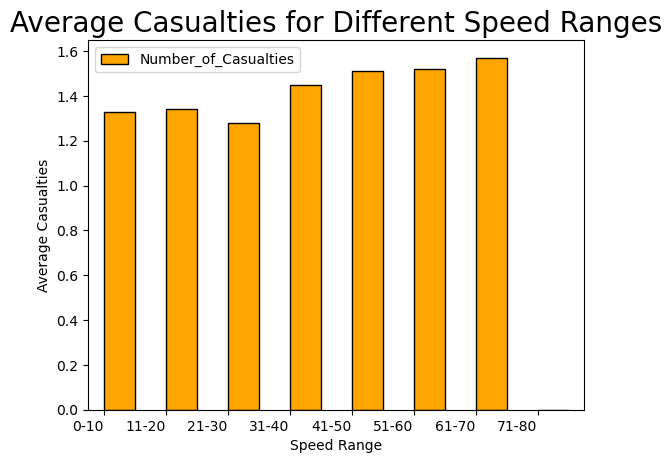

In [204]:
Speed_range.plot(kind='bar', x='Speed Range', y='Number_of_Casualties', color='orange', edgecolor='black',align ='edge')
plt.title('Average Casualties for Different Speed Ranges',fontdict={'fontsize':20})
plt.xlabel('Speed Range')
plt.ylabel('Average Casualties')
plt.xticks(rotation=0, ha='right')  # Adjust rotation and alignment of x-axis labels as needed
plt.show()

In [194]:
data.head()

,Unnamed: 0,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Longitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,-0.201349,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Clear,Cars
1,1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,-0.199248,Daylight,...,11,2,Metropolitan Police,Wet,Single carriageway,30,10:59,Urban,Clear,Cars
2,2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Minor,51.486668,-0.179599,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Clear,Cars
3,3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,-0.203110,Daylight,...,1,2,Metropolitan Police,Frosty,Single carriageway,30,08:10,Urban,Other,Heavy Motorcycles
4,4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,-0.173445,Darkness,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Clear,Cars


In [3]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'], format='%Y-%m-%d')
# Extract month names
data['Month Name'] = data['Accident Date'].dt.strftime('%B')

In [4]:
# Group by month and count the number of casualties
monthly_data = data.groupby(['Month Name', data['Accident Date'].dt.to_period(freq='M')]).agg({'Number_of_Casualties': 'count'}).reset_index()
monthly_data = monthly_data.rename(columns={'Accident Date':'Accident Month'})
print("Monthly Data:")
monthly_data = monthly_data.sort_values(by='Accident Month').set_index('Accident Month')
monthly_data.reset_index()

Monthly Data:


,Accident Month,Month Name,Number_of_Casualties
0,2021-01,January,13417
1,2021-02,February,10950
2,2021-03,March,13202
3,2021-04,April,12715
4,2021-05,May,13811
5,2021-06,June,13936
6,2021-07,July,14300
7,2021-08,August,13415
8,2021-09,September,13792
9,2021-10,October,14834


In [5]:
monthly_data['Percentage_change'] = (monthly_data['Number_of_Casualties'].pct_change() *100).round(2).apply(lambda x:f'{x:.2f}%')
monthly_data['Percentage_change']=monthly_data['Percentage_change'].replace('nan%','No Record')
monthly_data

,Month Name,Number_of_Casualties,Percentage_change
Accident Month,,,
2021-01,January,13417,No Record
2021-02,February,10950,-18.39%
2021-03,March,13202,20.57%
2021-04,April,12715,-3.69%
2021-05,May,13811,8.62%
2021-06,June,13936,0.91%
2021-07,July,14300,2.61%
2021-08,August,13415,-6.19%
2021-09,September,13792,2.81%


In [10]:
# Group by Quarter and count the number of casualties
Quarter_data = data.groupby([data['Accident Date'].dt.to_period(freq='Q')]).agg({'Number_of_Casualties': 'sum'}).reset_index()
Quarter_data = Quarter_data.rename(columns={'Accident Date':'Quarters'})
Quarter_data['Quarters'] = Quarter_data['Quarters'].astype(str)
print("Quarter Data:")
Quarter_data

Quarter Data:


,Quarters,Number_of_Casualties
0,2021Q1,50633
1,2021Q2,54915
2,2021Q3,56935
3,2021Q4,59660
4,2022Q1,44542
5,2022Q2,49772
6,2022Q3,51497
7,2022Q4,49926


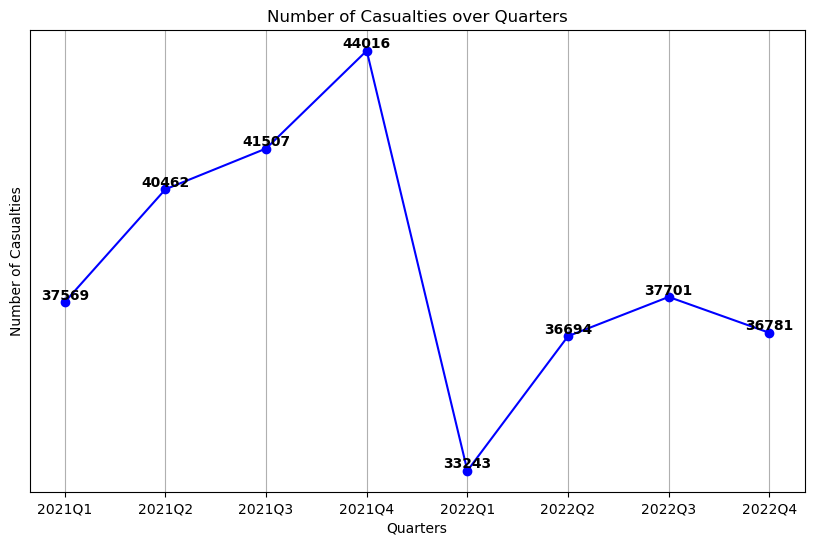

In [230]:
plt.figure(figsize=(10, 6))
plt.plot(Quarter_data['Quarters'], Quarter_data['Number_of_Casualties'], marker='o', color='blue', linestyle='-')
for i, value in enumerate(Quarter_data['Number_of_Casualties']):
    plt.text(Quarter_data['Quarters'][i], value, str(value), ha='center', va='bottom', fontsize=10, color='black',style = 'normal',weight= 'bold')
plt.title('Number of Casualties over Quarters')
plt.xlabel('Quarters')
plt.ylabel('Number of Casualties')
plt.yticks([])
plt.grid(True)
plt.show()

In [ ]:
Quarter_data['Percentage Change'] = (Quarter_data['Number_of_Casualties'].pct_change()*100).round(2).apply(lambda x:f'{x:.2f}%').replace('nan%','No Record')
Quarter_data

,Quarters,Number_of_Casualties,Percentage Change
0,2021Q1,37569,No Record
1,2021Q2,40462,7.70%
2,2021Q3,41507,2.58%
3,2021Q4,44016,6.04%
4,2022Q1,33243,-24.48%
5,2022Q2,36694,10.38%
6,2022Q3,37701,2.74%
7,2022Q4,36781,-2.44%


In [ ]:
data['Light_Conditions'].value_counts()

Light_Conditions
Daylight    227286
Darkness     80687
Name: count, dtype: int64

In [ ]:
# Location and region with higher incidence of accidents
data.columns
Location = data.groupby(data['Local_Authority_(District)']).agg({'Accident_Index':'count'}).sort_values(by = 'Accident_Index',ascending = False).head(10)
print("Top 10 Districts with Maximum number of Accidents")
Location.rename(columns={'Accident_Index':"Total Accidents"}).reset_index()




Top 10 Districts with Maximum number of Accidents


,Local_Authority_(District),Total Accidents
0,Birmingham,6165
1,Leeds,4140
2,Manchester,3132
3,Bradford,3006
4,Westminster,2811
5,Sheffield,2750
6,Liverpool,2611
7,Cornwall,2606
8,Barnet,2302
9,"Bristol, City of",2270


In [ ]:
# Specific junction types or road conditions associate with high number of accidents
junction_road_accidents = data[['Junction_Detail','Road_Surface_Conditions','Accident_Index']]
jra_pivot = pd.pivot_table(junction_road_accidents,index='Junction_Detail',columns='Road_Surface_Conditions',values='Accident_Index',fill_value=0,aggfunc='count')
print("Pivot Table representing the Number of Accidents happen in specific Junction type and Road Surface Condition")
jra_pivot

Pivot Table representing the Number of Accidents happen in specific Junction type and Road Surface Condition


Road_Surface_Conditions,Damp,Dry,Frosty,Other,Snowy,Wet
Junction_Detail,,,,,,
Crossroads,9,21263,633,15,294,7734
Mini-roundabout,0,2273,99,2,49,923
More than 4 arms (not roundabout),0,2929,90,4,40,1085
Not at junction or within 20 metres,293,78508,7307,116,2617,34253
Other junction,5,5647,291,6,115,2251
Private drive or entrance,7,7859,200,20,95,2694
Roundabout,9,19232,642,37,258,7086
Slip road,12,2767,170,1,80,1235
T or staggered junction,39,68488,2646,116,1210,24218


In [ ]:
# Investigate the 'Junction Detail' and 'Junction Control' columns to understand the role of the junctions in the accidents.
data['Junction_Control'].value_counts()


Junction_Control
Give way or uncontrolled               150045
Data missing or out of range            98056
Auto traffic signal                     32349
Not at junction or within 20 metres     25378
Stop sign                                1685
Authorised person                         460
Name: count, dtype: int64

In [ ]:
data['Junction_Detail'].value_counts()

Junction_Detail
Not at junction or within 20 metres    123094
T or staggered junction                 96718
Crossroads                              29948
Roundabout                              27264
Private drive or entrance               10875
Other junction                           8315
Slip road                                4265
More than 4 arms (not roundabout)        4148
Mini-roundabout                          3346
Name: count, dtype: int64

In [ ]:
junction = data[['Junction_Detail','Junction_Control','Accident_Index']]
junction_pivot = pd.pivot_table(junction, values = 'Accident_Index', columns = 'Junction_Control',index='Junction_Detail',fill_value=0,aggfunc='count')
junction_pivot

Junction_Control,Authorised person,Auto traffic signal,Data missing or out of range,Give way or uncontrolled,Not at junction or within 20 metres,Stop sign
Junction_Detail,,,,,,
Crossroads,56,15123,0,14224,0,544
Mini-roundabout,3,45,0,3287,0,11
More than 4 arms (not roundabout),12,2414,0,1690,0,32
Not at junction or within 20 metres,1,4,97707,4,25378,0
Other junction,54,936,60,7181,0,84
Private drive or entrance,22,114,289,10428,0,22
Roundabout,87,3152,0,23919,0,106
Slip road,22,243,0,3979,0,21
T or staggered junction,203,10318,0,85331,0,865


# Key Conclusions from Pivot:

## Crossroads:
- For a Crossroads junction, Auto Traffic signal along with Give way or uncontrolled is a significant factor contributing to accidents.
- The presence of an Authorized Person at Crossroads can be more effective in controlling traffic and reducing accidents.

## Mini-roundabout:
- Mini-roundabouts, circular junctions used to control traffic flow, generally work well in mitigating accidents.
- However, accidents tend to be higher when following the 'Give way' principle.

## More than 4 arms (not roundabout):
- The majority of accidents at junctions with more than 4 arms (not roundabouts) occur in situations where vehicles need to give way or where the junction is uncontrolled.
- Automated Traffic signals are present but may not effectively reduce accidents.

## Not at junction or within 20 metres:
- Significant data quality issues exist with a high count of accidents categorized as 'Data missing or out of range' (97707 accidents).
- The majority of accidents in this category (25378 accidents) are not controlled by specific junction control measures.

## Other Junction:
- 'Other junctions' exhibit a mix of junction control measures, with a majority being 'Give way or uncontrolled' (7181 accidents).

## Private drive or entrance:
- The majority of accidents (10428 accidents) at 'Private drive or entrance' locations occur where vehicles need to give way or the junction is uncontrolled.
- A significant number of accidents (289 accidents) involve automated traffic signals.

## Roundabout:
- The majority of accidents (23919 accidents) at roundabouts occur where vehicles need to give way or the roundabout is uncontrolled.
- A significant number of accidents (3152 accidents) involve automated traffic signals.

## Slip road:
- Accidents at 'Slip roads' primarily occur in situations where vehicles need to give way or the slip road is uncontrolled (3979 accidents).
- A small number of accidents (243 accidents) at slip roads involve automated traffic signals.

## T or staggered junction:
- Accidents at 'T or staggered junctions' are predominantly associated with situations where vehicles need to give way or the junction is uncontrolled, with a substantial count of 85331 accidents in this category. 
- A significant number of accidents (10318 accidents) at these junctions involve automated traffic signals.

## Weather and Road conditions:

In [ ]:
Road_Weather = data[['Road_Surface_Conditions','Weather_Conditions','Accident_Index']]
Road_Weather_pivot = pd.pivot_table(Road_Weather,index='Road_Surface_Conditions',columns='Weather_Conditions',values='Accident_Index',aggfunc='count',fill_value=0)
Road_Weather_pivot

Weather_Conditions,Clear,Foggy,Other,Raining,Snowy
Road_Surface_Conditions,,,,,
Damp,62,1,18,288,5
Dry,202634,179,5838,284,31
Frosty,6767,389,3290,296,1336
Other,43,1,273,0,0
Snowy,954,25,419,78,3282
Wet,37182,1095,5021,37457,723


**Conclusion:**
- Most accidents occur during dry conditions, with a significant number happening in clear weather.
- Wet conditions lead to a notable increase in accidents, especially during raining conditions.
- Frosty conditions contribute to a considerable number of accidents, with higher occurrences during clear weather.
- Snowy conditions result in accidents, especially during clear and rainy weather.
- Damp conditions contribute to accidents, primarily during clear and rainy weather.
- Other weather and road surface conditions have lower accident frequencies, with varying patterns.